In [14]:
import pandas as pd

url = "https://chamroukhi.com/data/apparts_Paris.csv"
apparts = pd.read_csv(url)

surfaces = apparts['surfaces']
prices = apparts['prices']

**Summary Statistics**

In [15]:
print(surfaces.describe())
print(prices.describe())

count     20.000000
mean      56.800000
std       26.333089
min       20.000000
25%       34.250000
50%       52.000000
75%       72.500000
max      110.000000
Name: surfaces, dtype: float64
count     20.000000
mean     252.200000
std      110.392887
min       78.000000
25%      188.750000
50%      259.000000
75%      321.250000
max      500.000000
Name: prices, dtype: float64


**Fit a Linear Regression Model**


In [16]:
import statsmodels.api as sm

X = sm.add_constant(surfaces)  # Adding intercept term
model = sm.OLS(prices, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 prices   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     96.26
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           1.20e-08
Time:                        17:39:31   Log-Likelihood:                -103.47
No. Observations:                  20   AIC:                             210.9
Df Residuals:                      18   BIC:                             212.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.6438     24.445      1.376      0.1

**Extracting Coefficients**

In [5]:
print(model.params)  # Extract coefficients
print(model.bse)     # Standard errors
print(model.pvalues) # p-values


const       33.643816
surfaces     3.847820
dtype: float64
const       24.444969
surfaces     0.392188
dtype: float64
const       1.856079e-01
surfaces    1.196624e-08
dtype: float64


**Plot the Fitted Line

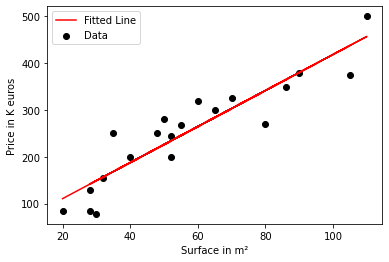

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(surfaces, prices, color="black", label="Data")
plt.plot(surfaces, model.predict(X), color="red", label="Fitted Line")
plt.xlabel("Surface in m²")
plt.ylabel("Price in K euros")
plt.legend()
plt.show()


**Compute R^2 coefficient**

In [7]:
print("R-squared:", model.rsquared)


R-squared: 0.8424632452125106


**Confidence Intervals for Coefficients**

In [8]:
print(model.conf_int(alpha=0.05)) # conf. level = 0.95

                  0          1
const    -17.713158  85.000790
surfaces   3.023864   4.671776


**Predict a new value**

In [9]:
# x_new = 50
x_new = pd.DataFrame({'const': 1, 'surfaces': [50]})
pred_conf = model.get_prediction(x_new).conf_int()
print(pred_conf)



[[204.15728366 247.91236234]]


** Residuals Analysis**

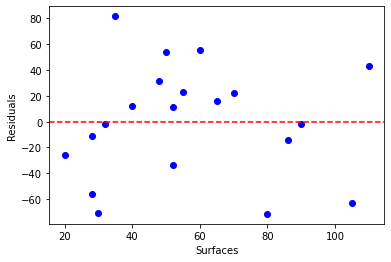

In [10]:
residuals = model.resid

plt.scatter(surfaces, residuals, color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Surfaces")
plt.ylabel("Residuals")
plt.show()


**Confidence Interval for the Regression Line**

In [11]:
seqx = np.linspace(surfaces.min(), surfaces.max(), 100)
X_seq = sm.add_constant(seqx)
Conf_Int = model.get_prediction(X_seq).conf_int()


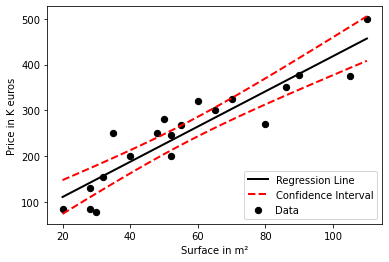

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot (equivalent to plot(y ~ x))
plt.scatter(surfaces, prices, color="black", s=40, label="Data")  # cex=0.8 in R is size in Python

# Regression line (equivalent to abline(lr_fit$coefficients[1], lr_fit$coefficients[2]))
plt.plot(seqx, model.params[0] + model.params[1] * seqx, color="black", linewidth=2, label="Regression Line")

# Confidence Interval (equivalent to matlines(seqx, Conf_Int, lty=c(2,2), lwd=c(3,3), col=c("red","red")))
plt.plot(seqx, Conf_Int[:, 0], 'r--', linewidth=2, label="Confidence Interval")  # Lower bound
plt.plot(seqx, Conf_Int[:, 1], 'r--', linewidth=2)  # Upper bound

# Legend (equivalent to legend() in R)
plt.legend(loc="lower right", fontsize=10)

# Labels and formatting
plt.xlabel("Surface in m²")
plt.ylabel("Price in K euros")

# Show plot
plt.show()


**Prediction interval**

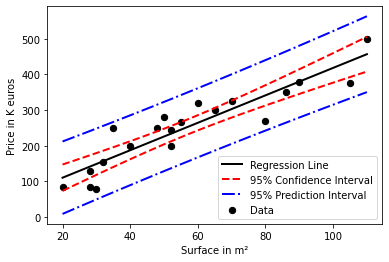

In [13]:
# Compute Prediction Interval (equivalent to `Pred_Int <- predict(lr_fit, data.frame(x = seqx), interval="prediction")`)
Pred_Int = model.get_prediction(X_seq).summary_frame(alpha=0.05)[['obs_ci_lower', 'obs_ci_upper']]

# Plot Data Points
plt.scatter(surfaces, prices, color="black", s=40, label="Data")

# Regression Line
plt.plot(seqx, model.predict(X_seq), color="black", linewidth=2, label="Regression Line")

# Confidence Interval (equivalent to `Conf_Int`)
plt.plot(seqx, Conf_Int[:, 0], 'r--', linewidth=2, label="95% Confidence Interval")  # Lower bound
plt.plot(seqx, Conf_Int[:, 1], 'r--', linewidth=2)  # Upper bound

# Prediction Interval (equivalent to `Pred_Int`)
plt.plot(seqx, Pred_Int['obs_ci_lower'], 'b-.', linewidth=2, label="95% Prediction Interval")  # Lower bound
plt.plot(seqx, Pred_Int['obs_ci_upper'], 'b-.', linewidth=2)  # Upper bound

# Legend
plt.legend(loc="lower right", fontsize=10)

# Labels
plt.xlabel("Surface in m²")
plt.ylabel("Price in K euros")

# Show plot
plt.show()


**Example, for an appart of 30𝑚2, would 120K be a good deal ?**